In time series literature, common features created:
1. Date / time related features
1. Lag features
1. Rolling window feature
1. Domain specific features

In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

from plotly.subplots import make_subplots
from multiprocessing import Pool
from functools import partial
from scipy.stats import ttest_rel, pearsonr, spearmanr

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from sktime.transformations.series.detrend import STLTransformer

from utils.common import read_bm_data, plot_confusion_matrix
from utils.features import compute_z_past


import os
import ta
import datetime
import tqdm
import pickle

In [2]:
df_wti_1m = pickle.load(open('./large_files/cl-1m.pkl', 'rb'))
df_wti_1m = df_wti_1m[(df_wti_1m['datetime'].dt.hour >= 8) & (df_wti_1m['datetime'].dt.hour < 16)]

df_wti = read_bm_data('./data/backtestmarket/cl-15m.csv')

# df = df_wti.copy()
# df = df[(df['datetime'].dt.hour >= 8) & (df['datetime'].dt.hour < 16)]
# df = df[(df['datetime'].dt.weekday == 2) & (df['datetime'].dt.year >= 2010) & (df['datetime'].dt.year <= 2019)]
# df.head()

In [3]:
df = df_wti_1m.copy()
df = df[(df['datetime'].dt.hour >= 8) & (df['datetime'].dt.hour < 16)]
df = df[(df['datetime'].dt.weekday == 2) & (df['datetime'].dt.year >= 2010) & (df['datetime'].dt.year <= 2019)]
df.head()

,date,time,open,high,low,close,volume,datetime,day
834818,2010-01-06,0800,81.54,81.55,81.51,81.54,393,2010-01-06 08:00:00-05:00,Wednesday
834819,2010-01-06,0801,81.54,81.54,81.52,81.53,156,2010-01-06 08:01:00-05:00,Wednesday
834820,2010-01-06,0802,81.53,81.53,81.52,81.53,47,2010-01-06 08:02:00-05:00,Wednesday
834821,2010-01-06,0803,81.52,81.52,81.50,81.51,32,2010-01-06 08:03:00-05:00,Wednesday
834822,2010-01-06,0804,81.51,81.54,81.51,81.53,27,2010-01-06 08:04:00-05:00,Wednesday


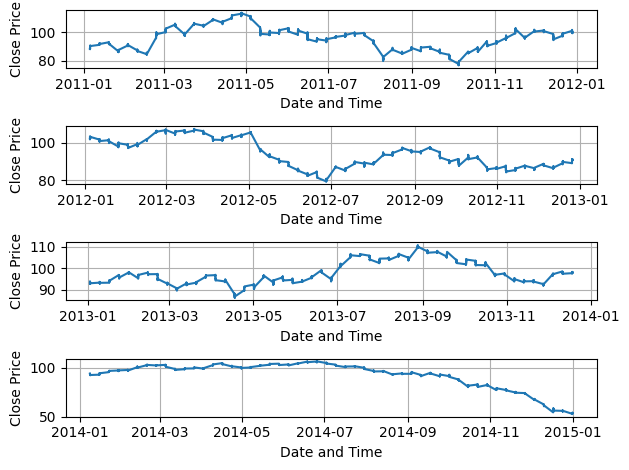

In [12]:
years = [2011, 2012, 2013, 2014]
fig, axs = plt.subplots(4, 1)

for year, ax in zip(years, axs):
    df_filter = df[df['datetime'].dt.year == year]
    ax.plot(df_filter['datetime'], df_filter['close'], linestyle='-')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Close Price')
    # ax.set_ticks(rotation=45)
    ax.grid(True)
plt.tight_layout()
plt.show()

# Price
z: standard deviation relative to mean of past 1hr, 30m, 15m  
pct: percentage change relative to mean of past 1hr, 30m, 15m  
mean: mean of past 1hr, 30m, 15m  
std: standard deviation of past 1hr, 30m, 15m  

Can be used as feature or target

In [14]:
df = compute_z_past(df, df_wti_1m, 1, 0, '1hr')
df = compute_z_past(df, df_wti_1m, 0, 30, '30m')
df = compute_z_past(df, df_wti_1m, 0, 15, '15m')
df.head(3)

In [13]:
df['month'] = df['datetime'].dt.month
df.head(2)

,date,time,open,high,low,close,volume,datetime,day,month
834818,2010-01-06,0800,81.54,81.55,81.51,81.54,393,2010-01-06 08:00:00-05:00,Wednesday,1
834819,2010-01-06,0801,81.54,81.54,81.52,81.53,156,2010-01-06 08:01:00-05:00,Wednesday,1


In [ ]:
# lag features